In [13]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [14]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format

Money_master = reviews_all('com.moneymasterpsb.app',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

The above line of your code is performing a web scraping operation specifically for reviews of an app from the **Google Play Store**, using the `google_play_scraper` library. Here is the break down:

1. **`reviews_all()` Function**:  
   This function is provided by the `google_play_scraper` library and is used to scrape **all reviews** of a specific app from the Google Play Store.

2. **`'com.moneymasterpsb.app'`**:  
   - This is the **package name** of the app whose reviews you want to scrape.  
   - Instead of using a URL as in some other scraping scripts, this library uses the **unique package name** that identifies the app on Google Play.  
   - For example, `'com.moneymasterpsb.app'` corresponds to the MoneyMaster app.

3. **`sleep_milliseconds=0`**:  
   - Specifies the delay between requests.  
   - A value of `0` means no delay, which can speed up the scraping process but might increase the risk of being flagged by the server.

4. **`lang='en'`**:  
   - Specifies the **language** of the reviews to scrape.  
   - `'en'` means only reviews written in English will be collected.

5. **`country='NG'`**:  
   - Specifies the **country** for which reviews are being fetched.  
   - `'NG'` corresponds to **Nigeria**, so only reviews visible in the Nigerian Play Store will be collected.

6. **`sort=Sort.NEWEST`**:  
   - Specifies how the reviews should be sorted.  
   - `Sort.NEWEST` means the reviews will be fetched starting with the most recent ones.

In [15]:
Money_master

[{'reviewId': '78502d3a-6d65-4cf6-b66d-84f1f3d64d90',
  'userName': 'John onah Sunday',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWyFt4R28sEgYiStDpIfrUcqKB2xzsPc01YbYKjV0Ygv5AFhRQv',
  'content': 'Nice 👍',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.1.1',
  'at': datetime.datetime(2024, 12, 9, 17, 52, 14),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.1.1'},
 {'reviewId': '535d53b6-42ca-4676-8e70-57d5a084ce4b',
  'userName': 'Jessica Yo',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIEWjHLBHbvuB9jEXeALefyMVg1Hk8FB8RTz1IlM_Y4GVLEGA=mo',
  'content': 'Favour dooshima',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 12, 8, 11, 38, 40),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': '8fdfeb58-f662-4b2f-ac4e-01843641d8d8',
  'userName': 'oloyede emmanuel omogbolahan',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-

### Let's explain the above output

   The `reviews_all()` function fetches the reviews in a **JSON format** and stores them in the `Money_master` variable. Each review includes data such as:
   - `reviewId`: Unique ID for the review.
   - `userName`: Name of the reviewer.
   - `content`: The review text.
   - `score`: Rating given (e.g., 1–5 stars).
   - `thumbsUpCount`: Number of likes the review received.
   - `reviewCreatedVersion`: App version when the review was created.

In [16]:
# convert the json data into a dataframe
Money_Master_df = pd.json_normalize(Money_master)

In [17]:
Money_Master_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,78502d3a-6d65-4cf6-b66d-84f1f3d64d90,John onah Sunday,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice 👍,5,0,1.1.1,2024-12-09 17:52:14,None,None,1.1.1
1,535d53b6-42ca-4676-8e70-57d5a084ce4b,Jessica Yo,https://play-lh.googleusercontent.com/a/ACg8oc...,Favour dooshima,5,0,None,2024-12-08 11:38:40,None,None,None
2,8fdfeb58-f662-4b2f-ac4e-01843641d8d8,oloyede emmanuel omogbolahan,https://play-lh.googleusercontent.com/a-/ALV-U...,It shall never be well with this application d...,1,0,None,2024-12-05 19:32:40,None,None,None
3,aff9f8c6-c8e7-46bf-93a8-0be8d55a7f29,Jones Edward,https://play-lh.googleusercontent.com/a/ACg8oc...,Great app,5,0,1.1.1,2024-12-04 20:51:21,None,None,1.1.1
4,a273cc30-e1b3-47da-9439-ac62797f2708,Ugbo Precious,https://play-lh.googleusercontent.com/a-/ALV-U...,"Today, MMPSB saved me from embarrassment. A si...",5,0,1.1.1,2024-12-04 17:54:40,None,None,1.1.1


In [7]:
Money_Master_df.shape

(125, 11)

## Sentiment Analysis

In [18]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "/home/chukwuemeka-james/Documents/Machine Learning Engineering Studio/Web Scraping/Website-Scraping-Studio"

In [19]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

In [13]:
# Test the reused model 

result = sentiment_analysis_reuse("Maryam keep the same positve energy and bad")
print(result)

[{'label': 'POSITIVE', 'score': 0.9301230907440186}]


In [23]:
#removing wildcharacter and cleaning the content column by casting to a str
Money_Master_df['content_new']= Money_Master_df['content'].astype('str')

In [24]:
Money_Master_df['result'] =Money_Master_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [17]:
Money_Master_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,78502d3a-6d65-4cf6-b66d-84f1f3d64d90,John onah Sunday,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice 👍,5,0,1.1.1,2024-12-09 17:52:14,None,None,1.1.1,Nice 👍,"[{'label': 'POSITIVE', 'score': 0.998640596866..."
1,535d53b6-42ca-4676-8e70-57d5a084ce4b,Jessica Yo,https://play-lh.googleusercontent.com/a/ACg8oc...,Favour dooshima,5,0,None,2024-12-08 11:38:40,None,None,None,Favour dooshima,"[{'label': 'POSITIVE', 'score': 0.997813463211..."
2,8fdfeb58-f662-4b2f-ac4e-01843641d8d8,oloyede emmanuel omogbolahan,https://play-lh.googleusercontent.com/a-/ALV-U...,It shall never be well with this application d...,1,0,None,2024-12-05 19:32:40,None,None,None,It shall never be well with this application d...,"[{'label': 'NEGATIVE', 'score': 0.998513400554..."
3,aff9f8c6-c8e7-46bf-93a8-0be8d55a7f29,Jones Edward,https://play-lh.googleusercontent.com/a/ACg8oc...,Great app,5,0,1.1.1,2024-12-04 20:51:21,None,None,1.1.1,Great app,"[{'label': 'POSITIVE', 'score': 0.998702526092..."
4,a273cc30-e1b3-47da-9439-ac62797f2708,Ugbo Precious,https://play-lh.googleusercontent.com/a-/ALV-U...,"Today, MMPSB saved me from embarrassment. A si...",5,0,1.1.1,2024-12-04 17:54:40,None,None,1.1.1,"Today, MMPSB saved me from embarrassment. A si...","[{'label': 'POSITIVE', 'score': 0.998910188674..."


In [25]:
# spliting the result into sentiment and score
Money_Master_df['sentiment'] = Money_Master_df['result'].apply(lambda x: (x[0]['label']))
Money_Master_df['score'] = Money_Master_df['result'].apply(lambda x: (x[0]['score']))

In [26]:
Money_Master_df[['content','score','sentiment']]

,content,score,sentiment
0,Nice 👍,0.998641,POSITIVE
1,Favour dooshima,0.997813,POSITIVE
2,It shall never be well with this application d...,0.998513,NEGATIVE
3,Great app,0.998703,POSITIVE
4,"Today, MMPSB saved me from embarrassment. A si...",0.998910,POSITIVE
...,...,...,...
120,It's a great experience using this app cause i...,0.998933,POSITIVE
121,"I downloaded the app yesterday, which opened a...",0.999493,NEGATIVE
122,Nice great ❤,0.998686,POSITIVE
123,Very good app Efficient,0.998847,POSITIVE


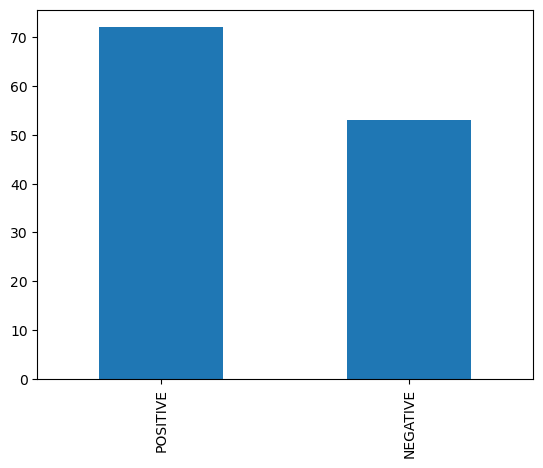

In [20]:
Money_Master_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling 

In [22]:
#generate a series for the reviews
feature_google=Money_Master_df['content']
print(feature_google.size)
feature_google.head()

125


0                                               Nice 👍
1                                      Favour dooshima
2    It shall never be well with this application d...
3                                            Great app
4    Today, MMPSB saved me from embarrassment. A si...
Name: content, dtype: object

In [23]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0                                               Nice 👍
1                                      Favour dooshima
2    It shall never be well with this application d...
3                                            Great app
4    Today, MMPSB saved me from embarrassment. A si...
Name: content, dtype: object


In [43]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

In [44]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name
0,-1,31,-1_perfect_sharp_development_project
1,0,262,0_to_the_my_is
2,1,55,1_fast_very_easy_experience
3,2,49,2_app_good_nice_this
4,3,26,3_very_good_nice_interested
5,4,25,4_excellent_fantastic_great_excellently
6,5,23,5_good_uh_thats_
7,6,17,6_nice_cool_great_job
8,7,12,7_wonderful_great_delighted_splendid


In [25]:
Money_Master_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [10]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
Money_Master_df.to_excel(output_file, index=False)

In [1]:
pip install mysql-connector-python --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 168.7 kB/s eta 0:00:0000:0100:03
Note: you may need to restart the kernel to use updated packages.


# Extract Transform and Load 

Kindly rename your dataframe for this to work 

In [63]:

dataframe=Money_Master_df 

In [64]:

data = [tuple(row) for row in Money_Master_df.to_numpy()]


In [65]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")


In [66]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )


In [67]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)


In [68]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Connected to MySQL Database!
Table `playstore_reviews` created successfully!
125 rows inserted/updated successfully!
MySQL connection closed.


In [11]:
df = pd.read_excel('playstore_reviews.xlsx')